In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from IPython.display import display
import json

rcParams['text.color'] = '#c7d5cc'  # set the default text color

In [2]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3869519)
print(freeze)
print(df)
print(related)
print(tactics)

     teammate  match_id                                    id      x     y  \
0       False   3869519  50d88cc2-208f-4272-9156-ea9f0049c8bc  118.3  36.7   
1       False   3869519  50d88cc2-208f-4272-9156-ea9f0049c8bc  114.6  37.1   
2       False   3869519  50d88cc2-208f-4272-9156-ea9f0049c8bc  115.8  40.2   
3       False   3869519  50d88cc2-208f-4272-9156-ea9f0049c8bc  114.4  42.0   
4       False   3869519  50d88cc2-208f-4272-9156-ea9f0049c8bc  114.4  43.5   
..        ...       ...                                   ...    ...   ...   
299      True   3869519  3dabf30e-401c-49ad-8976-4b124b1b7a6c   87.8  34.0   
300      True   3869519  3dabf30e-401c-49ad-8976-4b124b1b7a6c  103.9  39.8   
301      True   3869519  3dabf30e-401c-49ad-8976-4b124b1b7a6c  101.8  25.2   
302      True   3869519  3dabf30e-401c-49ad-8976-4b124b1b7a6c  101.0  46.8   
303      True   3869519  3dabf30e-401c-49ad-8976-4b124b1b7a6c   94.3  51.5   

     player_id                   player_name  position_id  \
0 

In [3]:
print(df.id)

0       7bce2bb7-7f9a-425b-baa6-b00a53ac7fd9
1       202afec8-41eb-46e4-95ac-96eda6e8100f
2       7232ed2d-529b-4640-8cfb-fe798ea9e0f5
3       f60038fb-1fa5-42d8-9725-13261620e3bd
4       794e7ac9-2535-4503-83f4-92c612c0ed78
                        ...                 
3801    a4b4456a-5df1-4ca6-8c5f-6943bb8c5156
3802    3dabf30e-401c-49ad-8976-4b124b1b7a6c
3803    0914f9ae-833d-4368-aa86-9ea75c0f22cd
3804    29b6a94d-43b9-40b4-b9de-b6a012d216aa
3805    37df091a-5958-4a17-bc0d-25ec0728aeb8
Name: id, Length: 3806, dtype: object


In [4]:
related.columns

Index(['match_id', 'id', 'index', 'type_name', 'id_related', 'index_related',
       'type_name_related'],
      dtype='object')

In [5]:
print(df.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'counterpress', 'under_pressure', 'pass_switch', 'off_camera',
       'pass_cross', 'aerial_won', 'technique_id', 'technique_name', 'out',
       'foul_committed_advantage', 'foul_won_advantage', 'dribble_nutmeg',
       'foul_won_defensive', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_statsbomb_xg', 'end_z', 'shot_key_pass_id',
       'goalkeeper_position_id', 'goalkeeper_p

In [6]:
print(df.body_part_name == 'Right Foot')

0       False
1       False
2       False
3       False
4        True
        ...  
3801    False
3802    False
3803    False
3804    False
3805    False
Name: body_part_name, Length: 3806, dtype: bool


In [7]:
mask_messi = (df.type_name == 'Pass') & (df.player_id == 5503)

In [8]:
df_pass = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y', 'outcome_name', 'id', 'body_part_name']]
mask_complete = df_pass.outcome_name.isnull()

In [9]:
df_pass.head()

,x,y,end_x,end_y,outcome_name,id,body_part_name
164,13.9,75.9,3.1,76.3,NaN,08d139e2-aa0e-4070-9aea-2e5a7c95ca75,Left Foot
216,70.3,45.7,71.0,31.0,NaN,05eaf23a-e954-4def-9ab4-a3e5e4a385b3,Left Foot
233,81.1,34.5,75.2,52.6,NaN,bc45abe9-fa29-46a7-8678-1bab73e5f451,Left Foot
325,70.0,21.8,68.7,10.8,NaN,47fbe20a-105f-4a04-96d9-a2d68562b19a,Head
834,77.2,76.3,55.3,76.7,NaN,b3a174ca-ea1e-4a39-be3d-3a10028992c7,Left Foot


In [10]:
# Filter the dataframe for Messi's left-footed passes
mask_messi_left = (df_pass['body_part_name'] == 'Left Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)
mask_messi_right = (df_pass['body_part_name'] == 'Right Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)

Text(0.5, 0.98, "Messi's left-footed passes vs Croatia")

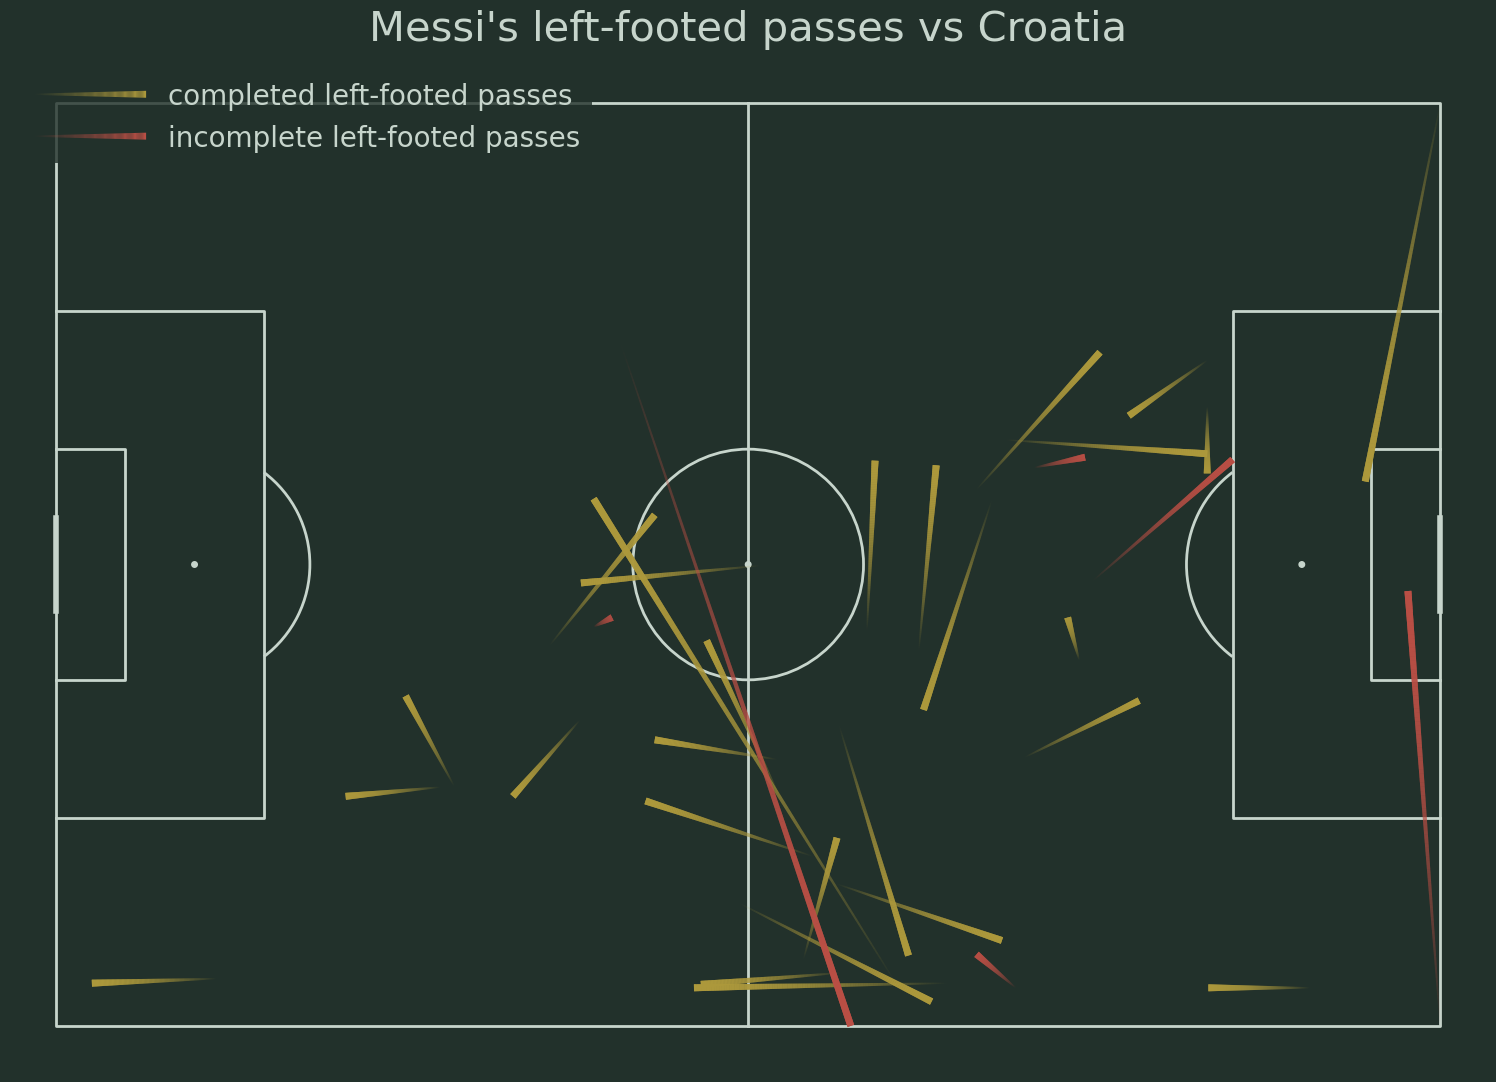

In [12]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the left-footed completed passes
lc1 = pitch.lines(df_pass[mask_messi_left & mask_complete].x, df_pass[mask_messi_left & mask_complete].y,
                  df_pass[mask_messi_left & mask_complete].end_x, df_pass[mask_messi_left & mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other left-footed passes
lc2 = pitch.lines(df_pass[mask_messi_left & ~mask_complete].x, df_pass[mask_messi_left & ~mask_complete].y,
                  df_pass[mask_messi_left & ~mask_complete].end_x, df_pass[mask_messi_left & ~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete left-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's left-footed passes vs Croatia", fontsize=30)


Text(0.5, 0.98, "Messi's right-footed passes vs Croatia")

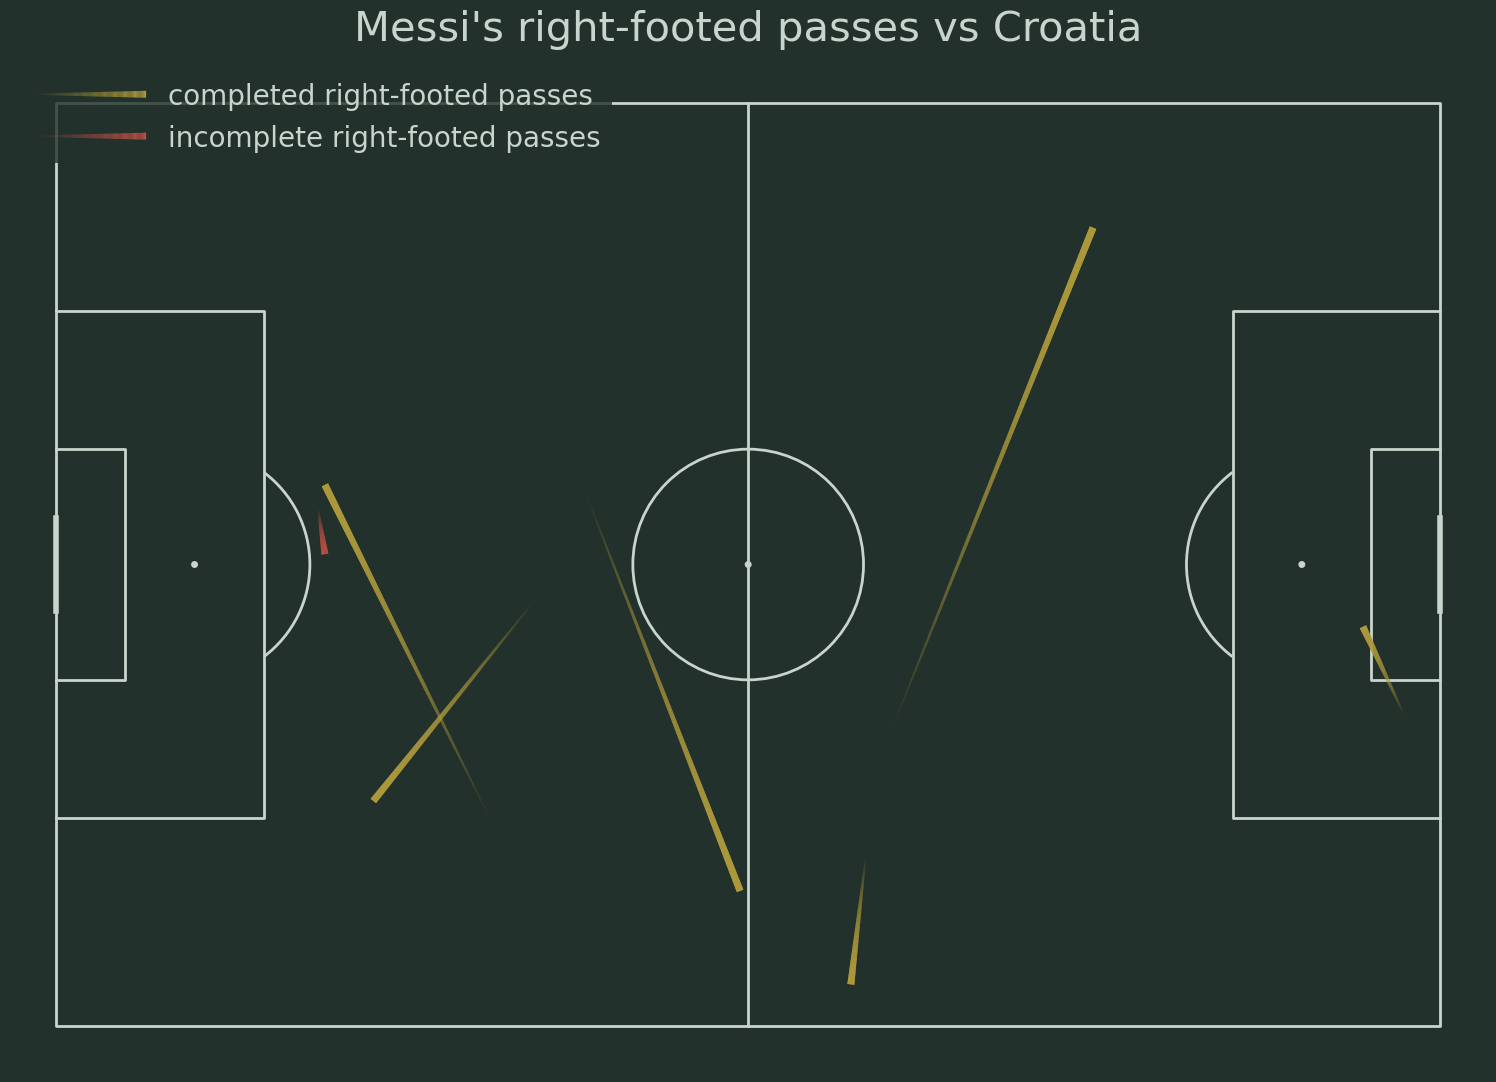

In [13]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the right-footed completed passes
lc1 = pitch.lines(df_pass[mask_messi_right & mask_complete].x, df_pass[mask_messi_right & mask_complete].y,
                  df_pass[mask_messi_right & mask_complete].end_x, df_pass[mask_messi_right & mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed right-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other right-footed passes
lc2 = pitch.lines(df_pass[mask_messi_right & ~mask_complete].x, df_pass[mask_messi_right & ~mask_complete].y,
                  df_pass[mask_messi_right & ~mask_complete].end_x, df_pass[mask_messi_right & ~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete right-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's right-footed passes vs Croatia", fontsize=30)


# Link used for this visualization

In [ ]:
#https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_lines.html#sphx-glr-gallery-pitch-plots-plot-lines-py